### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<hr>

### Load data given

In [2]:
train = pd.read_csv("Train_data.csv")
test = pd.read_csv("Test_data.csv")
train.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [3]:
#round values in GP to integer
train["GP"] = train["GP"].apply(np.floor)
test["GP"] = test["GP"].apply(np.floor)

<hr>

### Correlation of features

In [4]:
cols = train.columns
for col in cols:
    f = train['Target'].corr(train[col])
    print(f"{col} has {f:.3f} correlation with the Target")

GP has 0.415 correlation with the Target
MIN has 0.354 correlation with the Target
PTS has 0.354 correlation with the Target
FGM has 0.356 correlation with the Target
FGA has 0.328 correlation with the Target
FG% has 0.252 correlation with the Target
3P Made has 0.037 correlation with the Target
3PA has 0.019 correlation with the Target
3P% has 0.001 correlation with the Target
FTM has 0.333 correlation with the Target
FTA has 0.335 correlation with the Target
FT% has 0.089 correlation with the Target
OREB has 0.329 correlation with the Target
DREB has 0.323 correlation with the Target
REB has 0.338 correlation with the Target
AST has 0.214 correlation with the Target
STL has 0.268 correlation with the Target
BLK has 0.227 correlation with the Target
TOV has 0.314 correlation with the Target
Target has 1.000 correlation with the Target


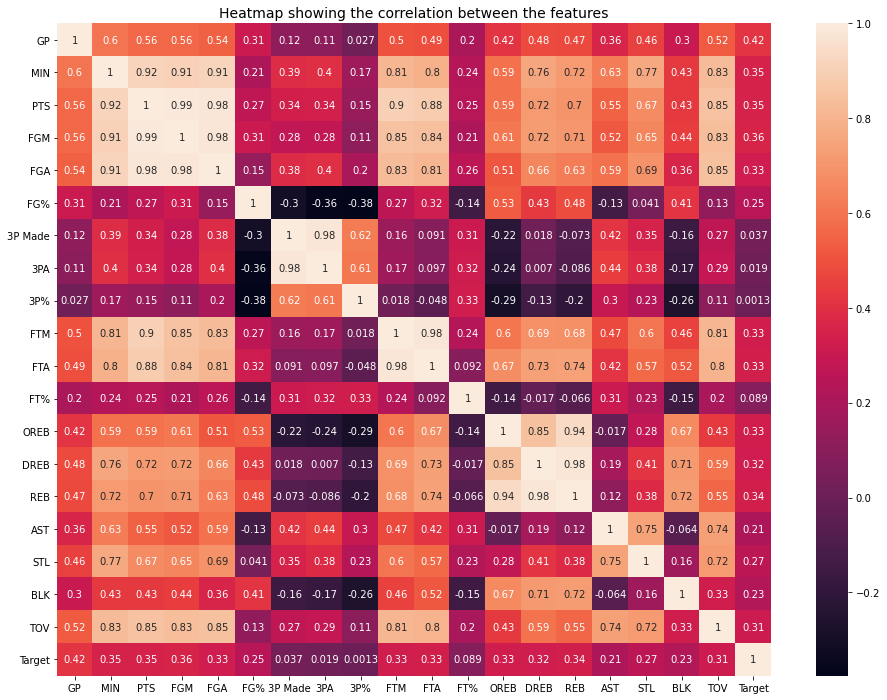

In [5]:
plt.figure(figsize=(16,12))
sns.heatmap(train.corr(), annot=True)
plt.title("Heatmap showing the correlation between the features", fontsize=14)
plt.show()

<hr>

### Features and Label separation

In [6]:
X = train.drop(['Target'], axis=1)
y = train.loc[:, 'Target']

X.shape

(1101, 19)

<hr>

### Split into training and validation datasets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101)

X_train.shape

(990, 19)

<hr>

### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test)

X_train = pd.DataFrame(X_scaled)
X_val = pd.DataFrame(X_val_scaled)
test = pd.DataFrame(test_scaled)

<hr>

### Model Selection
it is a classification problem, hence classification algorithms are utilized

In [9]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

#Random Forest Classifier, Gradient Boosting Classifier and Extra Trees Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
et = ExtraTreesClassifier()

<hr>

### Train the models

In [10]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
et.fit(X_train, y_train)

ExtraTreesClassifier()

<hr>

### Predictions

In [11]:
lrpred = lr.predict(X_val)
dtpred = dt.predict(X_val)
rfpred = rf.predict(X_val)
gbpred = gb.predict(X_val)
etpred = et.predict(X_val)

<hr>

### Evaluation

In [12]:
from sklearn.metrics import classification_report

print(f"Logistic: {classification_report(y_val, lrpred)}\n----------------------------------------------------")
print(f"\nDecision Tree: {classification_report(y_val, dtpred)}\n----------------------------------------------------")
print(f"\nForest: {classification_report(y_val, rfpred)}\n----------------------------------------------------")
print(f"\nGradient Boost: {classification_report(y_val, gbpred)}\n----------------------------------------------------")
print(f"\nExtra Trees: {classification_report(y_val, etpred)}")

Logistic:               precision    recall  f1-score   support

           0       0.82      0.74      0.78        61
           1       0.71      0.80      0.75        50

    accuracy                           0.77       111
   macro avg       0.77      0.77      0.77       111
weighted avg       0.77      0.77      0.77       111

----------------------------------------------------

Decision Tree:               precision    recall  f1-score   support

           0       0.76      0.74      0.75        61
           1       0.69      0.72      0.71        50

    accuracy                           0.73       111
   macro avg       0.73      0.73      0.73       111
weighted avg       0.73      0.73      0.73       111

----------------------------------------------------

Forest:               precision    recall  f1-score   support

           0       0.87      0.77      0.82        61
           1       0.75      0.86      0.80        50

    accuracy                           0.

#### From the classification report, the best algorithm is Extra Trees Classifier with the highest accuracy

<hr>

### Predict with test dataset

In [13]:
model = et
prediction = model.predict(test)

In [14]:
#print(prediction)

<hr>

### Export result in csv

In [15]:
my_result = pd.DataFrame(prediction)
my_result.index = test.index
my_result.columns = ["prediction"]
my_result.to_csv("results.csv", index=False)